In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load your properties data, replace 'your_file.csv' with the path to your CSV file
properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_SCORES.csv')

# Assuming the columns are named 'Latitude' and 'Longitude' and they contain the geographical coordinates
# Convert the Latitude and Longitude to a Shapely Point object and create a GeoDataFrame
gdf_properties = gpd.GeoDataFrame(
    properties_df,
    geometry=gpd.points_from_xy(properties_df.Longitude, properties_df.Latitude),
    crs="EPSG:4326"
)

# Load the neighborhood boundaries GeoJSON as a GeoDataFrame
gdf_neighborhoods = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')

# Perform a spatial join between properties and neighborhoods
# This will add the neighborhood information to your properties DataFrame
gdf_joined = gpd.sjoin(gdf_properties, gdf_neighborhoods, how="left", op='intersects')

# If you want to have a separate column for the neighborhood name, you might do something like this:
# This depends on the structure of your geojson file:
gdf_joined['Neighborhood'] = gdf_joined['name']  # Replace 'name' with the actual neighborhood name field from your geojson

# Drop the index_right column if it was added by sjoin
gdf_joined.drop('index_right', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
# Replace 'PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv' with your desired output file name
gdf_joined.to_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv', index=False)

# Print a message to let you know the process is completed
print('The properties DataFrame has been updated with neighborhood information and saved to a new CSV file.')


C:\Users\23798\AppData\Local\Temp\ipykernel_4324\387699766.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_SCORES.csv')
D:\Anaconda3\envs\cs506\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


The properties DataFrame has been updated with neighborhood information and saved to a new CSV file.


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')

# Check the column name for neighborhood in your CSV file and replace 'Neighborhood' if it's different
# Apply forward fill to fill missing neighborhood values
properties_df['Neighborhood'] = properties_df['Neighborhood'].ffill()

# Apply backward fill to fill any remaining missing neighborhood values
properties_df['Neighborhood'] = properties_df['Neighborhood'].bfill()

# Check if there are any remaining missing values in the 'Neighborhood' column
missing_values_count = properties_df['Neighborhood'].isnull().sum()
print(f"Remaining missing values in 'Neighborhood': {missing_values_count}")

# Save the DataFrame back to a CSV file
properties_df.to_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv', index=False)


C:\Users\23798\AppData\Local\Temp\ipykernel_4324\1759709768.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')


Remaining missing values in 'Neighborhood': 0


In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load property assessment data with neighborhoods
properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')
# Count the number of properties in each neighborhood
property_counts = properties_df['Neighborhood'].value_counts()

# Load the violations data
violations_df = pd.read_csv('cleaned2_PUBLIC_WORKS_VIOLATIONS.csv')
# Drop duplicates to ensure unique violations per location
unique_violations_df = violations_df.drop_duplicates(subset=['latitude', 'longitude'])

# Load the neighborhood boundaries
neighborhoods_gdf = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')

# Create a GeoDataFrame for the violations data
violations_gdf = gpd.GeoDataFrame(
    unique_violations_df,
    geometry=gpd.points_from_xy(unique_violations_df.longitude, unique_violations_df.latitude),
    crs="EPSG:4326"
)

# Perform a spatial join between violations and neighborhoods
violations_with_neighborhoods_gdf = gpd.sjoin(violations_gdf, neighborhoods_gdf, how="left", op='intersects')

# Count unique property violations per neighborhood
violation_counts = violations_with_neighborhoods_gdf['name'].value_counts()

# Calculate the ratio of properties with violations to total properties per neighborhood
violation_ratios = violation_counts / property_counts

# Save the ratios to a CSV file
violation_ratios.to_csv('Neighborhood_Violation_Ratios_PUBLIC.csv')

# Print out the ratios
print(violation_ratios)


C:\Users\23798\AppData\Local\Temp\ipykernel_18052\1318492255.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')
D:\Anaconda3\envs\cs506\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Allston                    0.075463
Back Bay                   0.036992
Bay Village                0.053743
Beacon Hill                0.072365
Brighton                   0.041108
Charlestown                0.036982
Chinatown                  0.120629
Dorchester                 0.082558
Downtown                   0.028876
East Boston                0.099395
Fenway                     0.027856
Hyde Park                  0.057624
Jamaica Plain              0.026498
Leather District           0.032787
Longwood                   0.028571
Mattapan                   0.082900
Mission Hill               0.089920
North End                  0.090841
Roslindale                 0.037196
Roxbury                    0.092313
South Boston               0.036635
South Boston Waterfront    0.010338
South End                  0.033642
West End                   0.021231
West Roxbury               0.023087
Name: count, dtype: float64


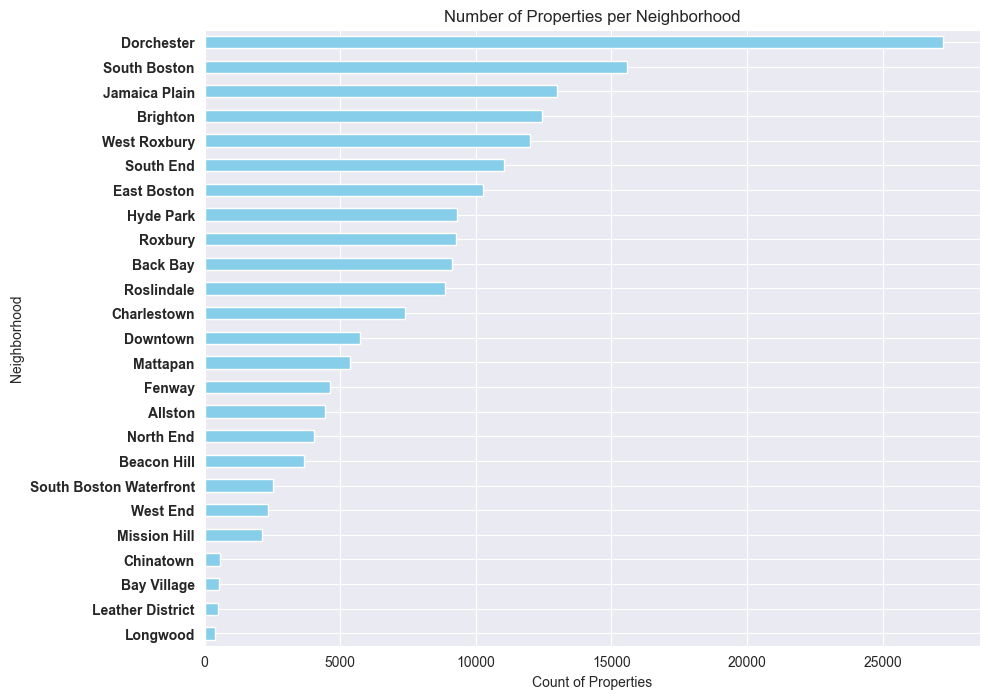

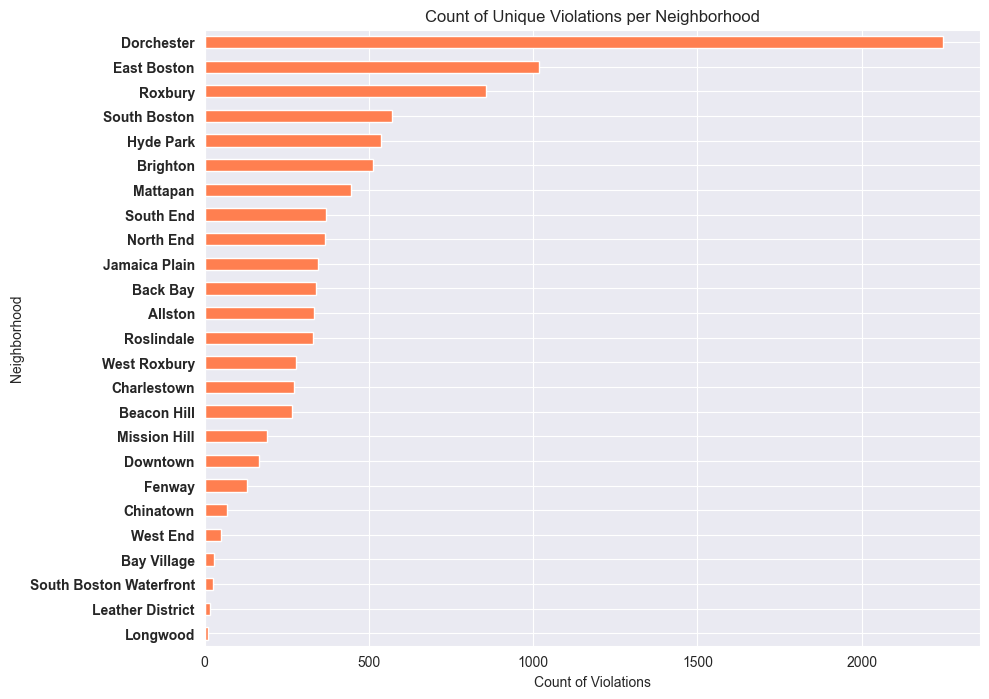

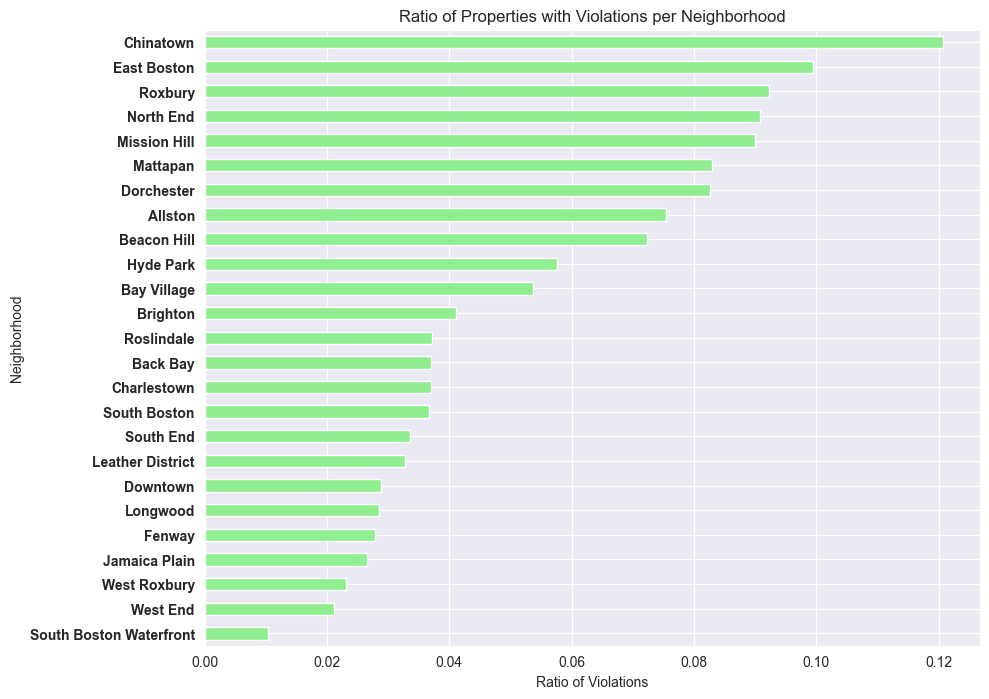

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
# sns.set_style("whitegrid")

# Visualize the number of properties per neighborhood
plt.figure(figsize=(10, 8))
property_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Properties per Neighborhood')
plt.xlabel('Count of Properties')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()

# Visualize the count of unique violations per neighborhood
plt.figure(figsize=(10, 8))
violation_counts.sort_values().plot(kind='barh', color='coral')
plt.title('Count of Unique Violations per Neighborhood')
plt.xlabel('Count of Violations')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()

# Visualize the ratio of properties with violations per neighborhood
plt.figure(figsize=(10, 8))
violation_ratios.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Ratio of Properties with Violations per Neighborhood')
plt.xlabel('Ratio of Violations')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()


In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load property assessment data with neighborhoods
properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')
# Count the number of properties in each neighborhood
property_counts = properties_df['Neighborhood'].value_counts()

# Load the violations data
violations_df = pd.read_csv('cleaned2_BUILDING_AND_PROPERTY_VIOLATIONS.csv')
# Drop duplicates to ensure unique violations per location
unique_violations_df = violations_df.drop_duplicates(subset=['latitude', 'longitude'])

# Load the neighborhood boundaries
neighborhoods_gdf = gpd.read_file('BPDA_Neighborhood_Boundaries.geojson')

# Create a GeoDataFrame for the violations data
violations_gdf = gpd.GeoDataFrame(
    unique_violations_df,
    geometry=gpd.points_from_xy(unique_violations_df.longitude, unique_violations_df.latitude),
    crs="EPSG:4326"
)

# Perform a spatial join between violations and neighborhoods
violations_with_neighborhoods_gdf = gpd.sjoin(violations_gdf, neighborhoods_gdf, how="left", op='intersects')

# Count unique property violations per neighborhood
violation_counts = violations_with_neighborhoods_gdf['name'].value_counts()

# Calculate the ratio of properties with violations to total properties per neighborhood
violation_ratios = violation_counts / property_counts

# Save the ratios to a CSV file
violation_ratios.to_csv('Neighborhood_Violation_Ratios_BUILDING.csv')

# Print out the ratios
print(violation_counts)
print(property_counts)
print(violation_ratios)


C:\Users\23798\AppData\Local\Temp\ipykernel_18052\1281974002.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv('PROPERTY_ASSESSMENT_WITH_NEIGHBORHOODS.csv')
D:\Anaconda3\envs\cs506\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


name
Dorchester                 13411
East Boston                 5314
South Boston                5259
Roxbury                     4854
Brighton                    4537
Jamaica Plain               3920
Hyde Park                   3506
Roslindale                  3149
South End                   3047
Mattapan                    2720
Charlestown                 2394
West Roxbury                2242
Allston                     2177
Back Bay                    1921
Beacon Hill                 1647
North End                   1627
Mission Hill                1335
Fenway                       998
Downtown                     718
Chinatown                    314
Bay Village                  235
West End                     146
South Boston Waterfront      123
Leather District              92
Longwood                      26
Name: count, dtype: int64
Neighborhood
Dorchester                 27205
South Boston               15559
Jamaica Plain              12982
Brighton                   12455

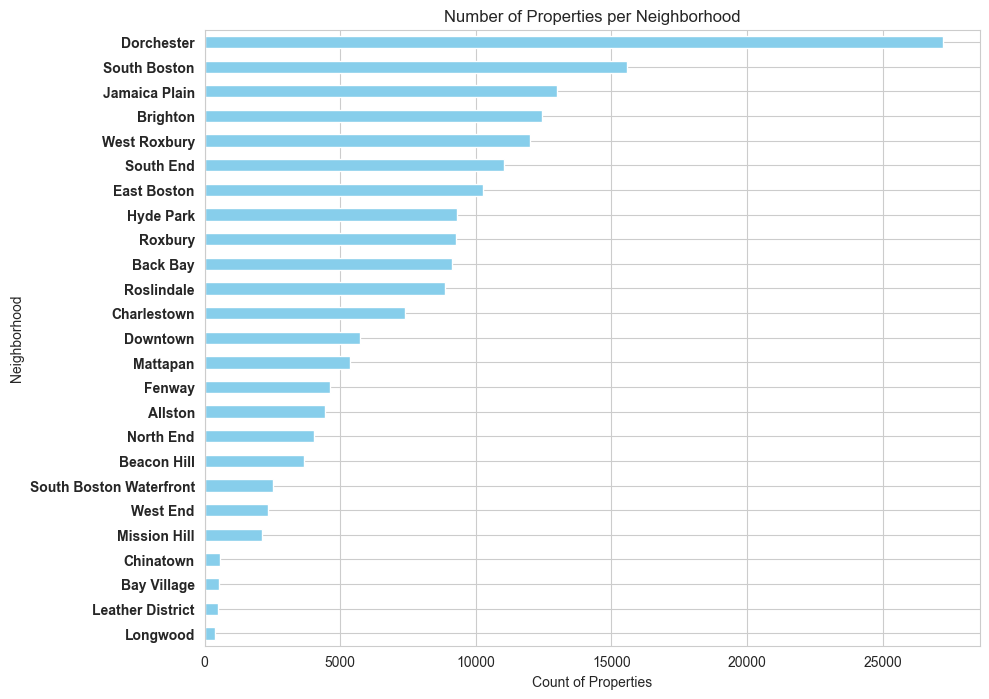

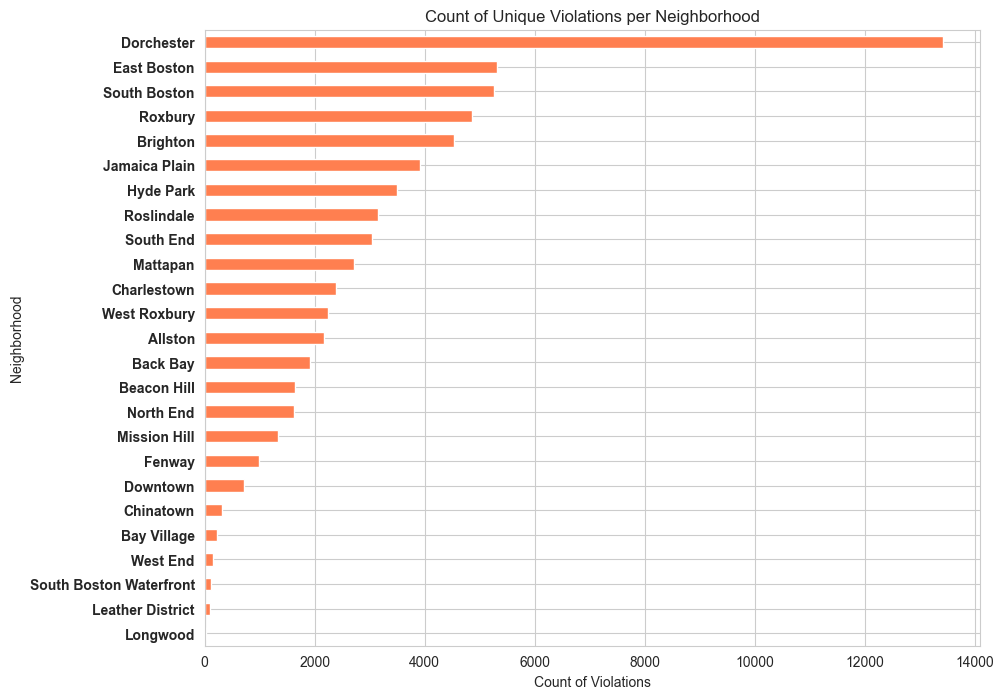

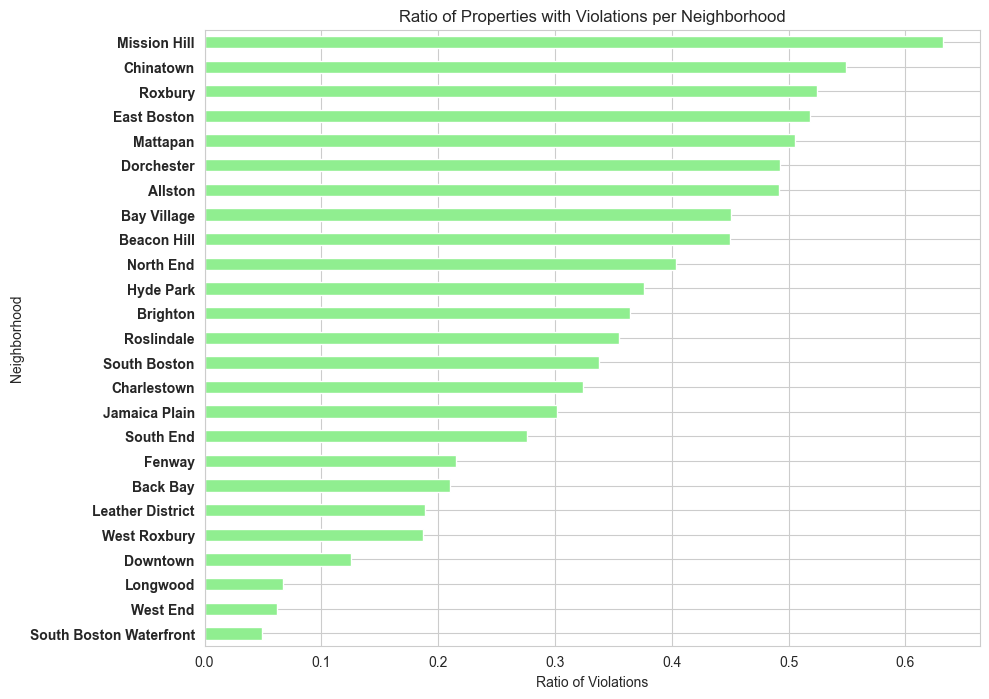

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming previous steps have been completed and the violation_ratios DataFrame is ready...

# Set the style for seaborn
sns.set_style("whitegrid")

# Visualize the number of properties per neighborhood
plt.figure(figsize=(10, 8))
property_counts.sort_values().plot(kind='barh', color='skyblue')
plt.title('Number of Properties per Neighborhood')
plt.xlabel('Count of Properties')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()

# Visualize the count of unique violations per neighborhood
plt.figure(figsize=(10, 8))
violation_counts.sort_values().plot(kind='barh', color='coral')
plt.title('Count of Unique Violations per Neighborhood')
plt.xlabel('Count of Violations')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()

# Visualize the ratio of properties with violations per neighborhood
plt.figure(figsize=(10, 8))
violation_ratios.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Ratio of Properties with Violations per Neighborhood')
plt.xlabel('Ratio of Violations')
plt.ylabel('Neighborhood')
plt.yticks(fontweight='bold')
plt.show()
